<a href="https://colab.research.google.com/github/ucfilho/Doubts_Students/blob/master/sorgo_ANN_dez_21_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split

In [2]:
uploaded = files.upload()

Saving Sorgo_DBK550.csv to Sorgo_DBK550.csv


In [3]:
#DAT=pd.read_csv("sorgopontanegra.csv")
#DAT=pd.read_csv("Sorgo_1G100.csv")
DAT=pd.read_csv("Sorgo_DBK550.csv")
print(DAT.head())

   Run       SO    IN        GL       Et       Fi       PD        ST       Y1
0    1   35.000  15.0   24.8075  37.0896  25.8914  51.5134   24.8075  80.7967
1    2   35.000  45.0   27.0086  47.4416  25.5885  65.8911   27.0086  94.9252
2    3  165.000  15.0   94.7485  31.9991  45.3776  44.4432   94.7485  86.0409
3    4  165.000  45.0  105.3143  37.5658  52.7557  52.1747  105.3143  90.8751
4    5   25.445  30.0   19.1501  47.1655  32.5240  65.5077   19.1501  96.7636


In [4]:
Col_Indep=['SO','IN']
names =[ 'Et']

In [5]:
nrows, ncols = DAT.shape
itrain, itest =train_test_split(range(nrows), test_size=0.2,random_state=11) # 2,3,4,5,6,7,8,9,10,11,22

In [6]:
# separa as colunas de interesse
cols = len(Col_Indep)
Index=range(1,cols+1)
Dat_Select=[]
x_train=DAT.iloc[itrain,Index].copy()
y_train=DAT.iloc[itrain,-1].copy()
x_test = DAT.iloc[itest,Index].copy()
y_test = DAT.iloc[itest,-1].copy()

In [7]:
scaler_x = StandardScaler().fit(DAT.iloc[:,Index])
scaler_y = StandardScaler().fit(np.array(DAT.iloc[:,-1]).reshape(-1,1))

In [8]:
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)
y_train = scaler_y.transform(np.array(y_train).reshape(-1, 1))
y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1))

In [9]:
x_train

array([[ 1.28823960e+00,  1.28810056e+00],
       [ 9.90877321e-05,  0.00000000e+00],
       [-1.47739809e+00,  0.00000000e+00],
       [ 1.47650630e+00,  0.00000000e+00],
       [ 9.90877321e-05,  1.47702197e+00],
       [-1.28804143e+00,  1.28810056e+00],
       [-1.28804143e+00, -1.28810056e+00],
       [ 9.90877321e-05,  0.00000000e+00]])

In [10]:
# define a rede neural 
def optmANN(x_train,x_test,y_train,y_test):
  resp_scored = []
  for i in range(1,10):
    r_calc =[]
    N_Hidden = i
    clf = MLPRegressor(solver='lbfgs',activation='tanh',
                      alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                        random_state=1)
    clf.fit(x_train, y_train)
    y_calc_train=clf.predict(x_train)
    y_calc_test=clf.predict(x_test)
    y_calc_train=pd.DataFrame(y_calc_train)
    y_calc_test=pd.DataFrame(y_calc_test)
    r2_test= r2_score(y_test,y_calc_test)
    r2_train = r2_score(y_train,y_calc_train)
    r_calc.append(i)
    r_calc.append(r2_train)
    r_calc.append(r2_test)
    resp_scored.append(r_calc)

  df = pd.DataFrame(resp_scored,columns=['hidden','r2 train','r2 test'])
  return df

In [11]:
df = optmANN(x_train,x_test,y_train,y_test)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.340464,-7.964457
1,2,0.981449,-2508.336112
2,3,0.982108,-279.443323
3,4,0.989656,-351.674079
4,5,0.993128,-0.021964
5,6,0.993128,-13.909904
6,7,0.993128,-3.061147
7,8,0.993128,-2.717770
8,9,0.993128,-0.531813


In [12]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [13]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [14]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)

In [15]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=scaler_y.inverse_transform(y_calc_train)
y_calc_test=scaler_y.inverse_transform(y_calc_test)
y_test=scaler_y.inverse_transform(y_test)
y_train=scaler_y.inverse_transform(y_train)

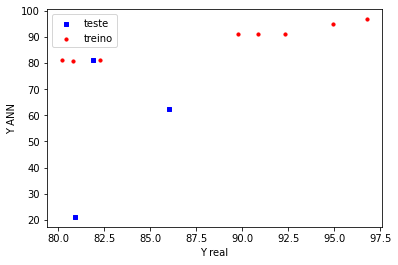

In [16]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Y ANN')
plt.xlabel('Y real')
plt.show()

In [17]:
r2_test= r2_score(y_test,y_calc_test)
r2_train = r2_score(y_train,y_calc_train)
print('r2 (train)=',r2_train)
print('r2 (test)=',r2_test)

r2 (train)= 0.9821081792222297
r2 (test)= -279.4433227920335


In [18]:
y_calc_train

array([[90.97958135],
       [81.24103196],
       [96.7627573 ],
       [90.97739871],
       [90.98081951],
       [94.92524146],
       [80.79771952],
       [81.24103196]])

In [19]:
y_train

array([[90.8751],
       [80.229 ],
       [96.7636],
       [92.3088],
       [89.7556],
       [94.9252],
       [80.7967],
       [82.253 ]])

In [20]:
DAT

,Run,SO,IN,GL,Et,Fi,PD,ST,Y1
0,1,35.000,15.0,24.8075,37.0896,25.8914,51.5134,24.8075,80.7967
1,2,35.000,45.0,27.0086,47.4416,25.5885,65.8911,27.0086,94.9252
2,3,165.000,15.0,94.7485,31.9991,45.3776,44.4432,94.7485,86.0409
3,4,165.000,45.0,105.3143,37.5658,52.7557,52.1747,105.3143,90.8751
4,5,25.445,30.0,19.1501,47.1655,32.5240,65.5077,19.1501,96.7636
5,6,174.500,30.0,90.4748,30.9970,42.8579,43.0514,90.4748,92.3088
6,7,100.000,12.8,68.6768,35.9944,39.0770,49.9923,68.6768,80.9247
7,8,100.000,47.2,67.4005,39.1804,37.2130,54.4172,67.4005,89.7556
8,9,100.000,30.0,68.6178,35.6543,43.6960,49.5199,68.6178,80.2290
9,10,100.000,30.0,66.8714,35.6234,41.4865,49.4770,66.8714,82.2530


In [21]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [22]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)


In [23]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
print(Condicoes)
resp = pd.DataFrame(scaler_x.inverse_transform(Condicoes),columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes)
Y = scaler_y.inverse_transform(Y.reshape(-1,1))
print(Y)

          0         1
0  0.992484  0.993409
           SO         IN
0  150.076088  41.568298
[[90.97957007]]


In [24]:
DAT.columns=['Run', 'SO', 'IN', 'GL ', 'Et', 'Fi ', 'PD', 'ST', 'Y1']

In [25]:
# separa as colunas de interesse
x_train=DAT[Col_Indep]
y_train=DAT[names]

In [26]:
Col_Indep

['SO', 'IN']

In [27]:
x_train = scaler_x.transform(x_train)
y_train = scaler_y.transform(np.array(y_train).reshape(-1, 1))

In [28]:
df = optmANN(x_train,x_train,y_train,y_train)
df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

,hidden,r2 train,r2 test
0,1,0.891896,0.891896
1,2,0.964273,0.964273
2,3,0.999894,0.999894
3,4,0.999896,0.999896
4,5,0.999897,0.999897
5,6,0.999897,0.999897
6,7,0.999897,0.999897
7,8,0.999897,0.999897
8,9,0.999897,0.999897


In [29]:
# define a rede neural 
N_Hidden= 3
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=3,
             random_state=1, solver='lbfgs')

In [30]:
def function(x, clf=clf):
  n = len(x)
  x=x.reshape((1, n))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [31]:
nrows,ncols= x_train.shape
bounds = [(-1,1)]*ncols
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)

In [32]:
n = len(bounds)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, n))
print(Condicoes)
resp = pd.DataFrame(scaler_x.inverse_transform(Condicoes),columns=Col_Indep)
print(resp)
Y=clf.predict(Condicoes)
Y = scaler_y.inverse_transform(Y.reshape(-1,1))
print(Y)

     0         1
0 -1.0  0.311885
          SO         IN
0  49.534667  33.631922
[[51.43810768]]
